In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker

In [2]:
# Set font size of plot elements\n",
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 18
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
def temp_from_photons(ω_c, num_photons):
    hbar_ov_k = 7.639e-12 
    return hbar_ov_k * ω_c / np.log(1 / num_photons + 1)

In [4]:
def photons_from_temp(ω_c, temp):
    hbar_ov_k = 7.639e-12
    return (np.exp(hbar_ov_k * ω_c / temp) - 1) ** -1

In [5]:
def mean_photons_cavity(κ, ω_c, Q, r, g, nT, nc):
    """
    function for calculating the steady state photon number in the cavity per equation 98 in Kurt's supplemental info document
    """
    num = (κ + ω_c / Q) * nT + r * g ** 2 / ((r/2)**2 + (r/2)*((κ+ω_c / Q) / 2) + g ** 2) * nc
    den = (κ + ω_c / Q) + r * g ** 2 / ((r/2)**2 + (r/2)*((κ+ω_c / Q) / 2) + g ** 2)
    return num / den

In [6]:
def full_mean_photons_cav(κ, ω_c, γ, r, g, nT, nc, Δ):
    num = (κ + γ) * nT * ((κ + γ) * r / 4 + g ** 2 + r ** 2 / 4 + 1j * r * Δ / 2) + g * r ** 2 * nc
    den = (-Δ + 1j * (r + κ + γ) / 2) * ((κ + γ) * r / 4 + g ** 2 + 1j * r * Δ / 2)
    return 0.5 * np.abs(num / den)

In [7]:
def get_fidelity(num_photons):
    return 1 / (1 + num_photons)

We want to first look at the expected fidelity using the experimental values from the paper.  That will give us a reference point.  We're going to start with assuming that these parameters don't really change as you decrease the temperature.  In practice, however, they definitely will.

In [8]:
# Define parameters
ωc = 2.87 * 2 * np.pi * 1e9
g = 2 * np.pi * 197.7e3
r = 2 * np.pi * 229e3
γ = 2 * np.pi * 140e3
κ = 2 * np.pi * 185.1e3
P = 0.8
nc = 0.5 * (1 - P) / P
T = 5
nT = photons_from_temp(ωc, T)

In [9]:
# Calculate the average number of photons in the  and the fidelity
nbar = full_mean_photons_cav(κ, ωc, γ, r, g, nT, nc, 0)
F = get_fidelity(nbar)

print("Avg. Number of photons in cavity mode: ", nbar)
print("Fidelity with ground state: ", F)

Avg. Number of photons in cavity mode:  25.817303044399043
Fidelity with ground state:  0.03728935748476975


In [10]:
# Now let's vary g
g = np.logspace(5, 7, 1000)

# Calculate the average number of photons in the cavity and the fidelity
nbar_v_g = full_mean_photons_cav(κ, ωc, γ, r, g, nT, nc, 0)
F_v_g = get_fidelity(nbar_v_g)

Text(0.5, 0, 'g (Hz)')

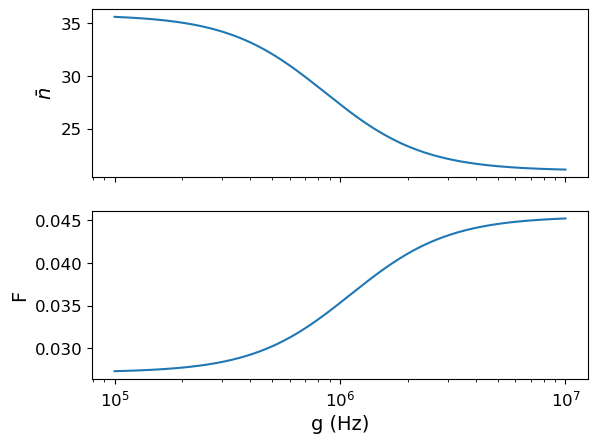

In [11]:
fig = plt.figure(1)
ax = fig.subplots(2, 1, sharex='all')

# Plot number of photons in cavity mode vs g
ax[0].semilogx(g, nbar_v_g)
ax[0].set_ylabel("$\\bar{n}$")

# Plot fidelity vs g
ax[1].semilogx(g, F_v_g)
ax[1].set_ylabel("F")
ax[1].set_xlabel("g (Hz)")

In [12]:
# From the paper, we know that r >> κ + γ and ~ g for best results.  Let's fix g to the experimental value
# and vary the others one at a time to see the impact
g = 2 * np.pi * 197.7e3
r_fixed = 2 * np.pi * 229e3
r = np.logspace(1, 8, 1000)
κ_fixed = 2 * np.pi * 185.1e3
κ = np.logspace(1, 8, 1000)
γ_fixed = 2 * np.pi * 140e3
γ = np.logspace(1, 8, 1000)

In [13]:
# Calculate the average number of photons in the cavity and the fidelity
nbar_v_r = full_mean_photons_cav(κ_fixed, ωc, γ_fixed, r, g, nT, nc, 0)
F_v_r = get_fidelity(nbar_v_r)

nbar_v_κ = full_mean_photons_cav(κ, ωc, γ_fixed, r_fixed, g, nT, nc, 0)
F_v_κ = get_fidelity(nbar_v_κ)

nbar_v_γ = full_mean_photons_cav(κ_fixed, ωc, γ, r_fixed, g, nT, nc, 0)
F_v_γ = get_fidelity(nbar_v_γ)

Text(0.5, 0, 'γ (Hz)')

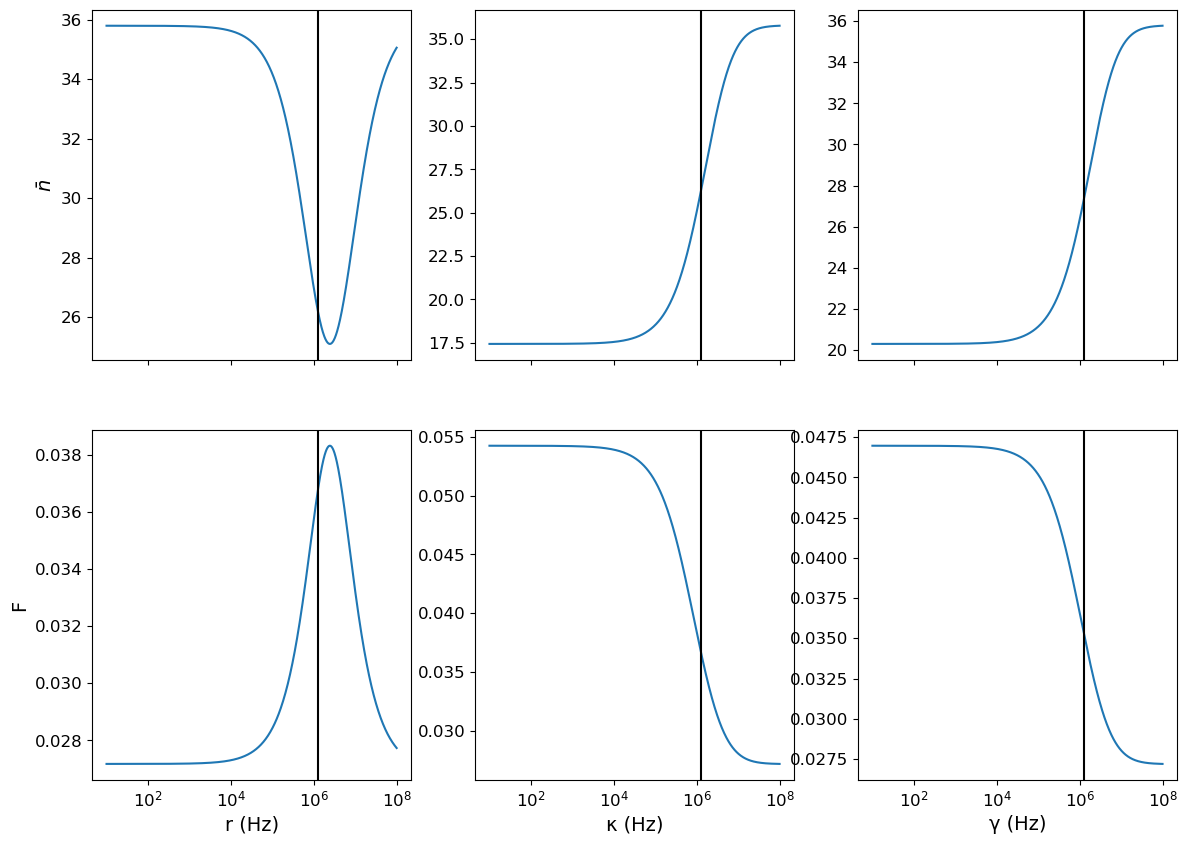

In [14]:
fig = plt.figure(1, figsize=(14, 10))
ax = fig.subplots(2, 3, sharex='col')

# Plot number of photons in cavity mode vs r
ax[0][0].semilogx(r, nbar_v_r)
ax[0][0].axvline(x=g, color='k')
ax[0][0].set_ylabel("$\\bar{n}$")

# Plot fidelity vs r
ax[1][0].semilogx(r, F_v_r)
ax[1][0].axvline(x=g, color='k')
ax[1][0].set_ylabel("F")
ax[1][0].set_xlabel("r (Hz)")

# Plot number of photons in cavity mode vs κ
ax[0][1].semilogx(κ, nbar_v_κ)
ax[0][1].axvline(x=g, color='k')

# Plot fidelity vs κ
ax[1][1].semilogx(κ, F_v_κ)
ax[1][1].axvline(x=g, color='k')
ax[1][1].set_xlabel("κ (Hz)")

# Plot number of photons in cavity mode vs γ
ax[0][2].semilogx(γ, nbar_v_γ)
ax[0][2].axvline(x=g, color='k')

# Plot fidelity vs κ
ax[1][2].semilogx(γ, F_v_γ)
ax[1][2].axvline(x=g, color='k')
ax[1][2].set_xlabel("γ (Hz)")

In [15]:
# Set κ and γ to a small as an ideal case calculation
κ = 0
γ = 1e3
r = 1e5
g = np.logspace(4, 7, 1000)
test_r = 0.5 * g

In [16]:
# Repeat calculations for g in a more ideal case than the experimental values
# Calculate the average number of photons in the cavity and the fidelity
nbar_v_g = full_mean_photons_cav(κ, ωc, γ, r, g, nT, nc, 0)
F_v_g = get_fidelity(nbar_v_g)

test_nbar_v_g = full_mean_photons_cav(κ, ωc, γ, test_r, g, nT, nc, 0)
test_F_v_g = get_fidelity(test_nbar_v_g)

Text(0.5, 0, 'g (Hz)')

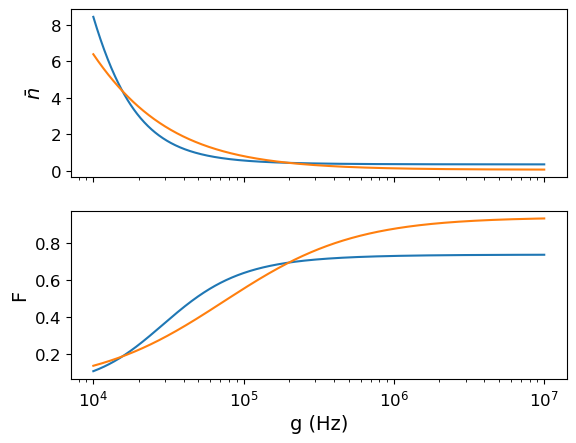

In [17]:
fig = plt.figure(1)
ax = fig.subplots(2, 1, sharex='all')

# Plot number of photons in cavity mode vs g
ax[0].semilogx(g, nbar_v_g)
ax[0].semilogx(g, test_nbar_v_g)
ax[0].set_ylabel("$\\bar{n}$")

# Plot fidelity vs g
ax[1].semilogx(g, F_v_g)
ax[1].semilogx(g, test_F_v_g)
ax[1].set_ylabel("F")
ax[1].set_xlabel("g (Hz)")

In [18]:
# Want to narrow down how close r should be to g for ideal cooling
gs = np.array([1e4, 1e5, 1e6, 1e7])
test_rs = np.linspace(0.1, 2.5, 1000)
nbars = np.zeros((gs.shape[0], test_rs.shape[0]))
for i in range(gs.shape[0]):
    nbars[i] = full_mean_photons_cav(κ, ωc, γ, test_rs * gs[i], gs[i], nT, nc, 0)

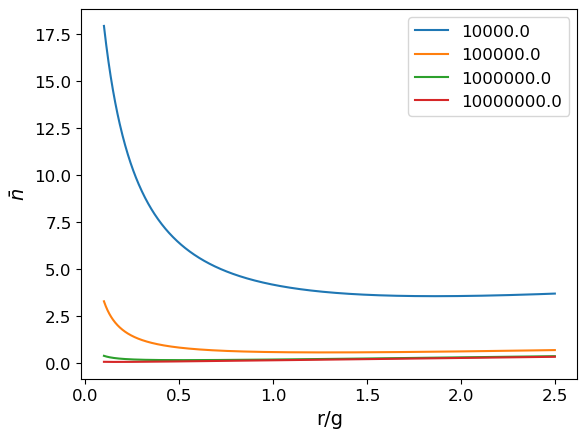

In [19]:
for i in range(gs.shape[0]):
    plt.plot(test_rs, nbars[i], label=str(gs[i]))

plt.xlabel("r/g")
plt.ylabel("$\\bar{n}$")
plt.legend()

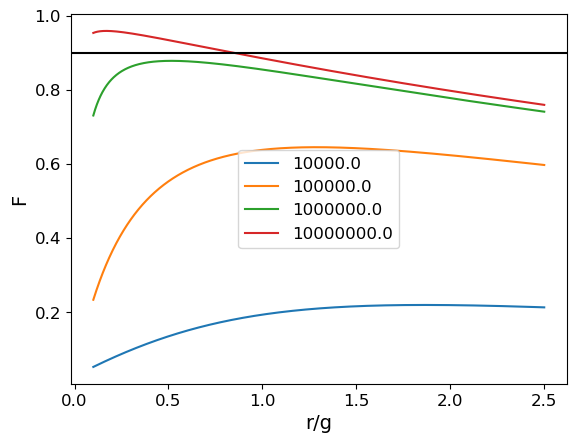

In [20]:
for i in range(gs.shape[0]):
    Fs = get_fidelity(nbars[i])
    plt.plot(test_rs, Fs, label=str(gs[i]))

plt.axhline(y=0.9, color='k')
plt.xlabel("r/g")
plt.ylabel("F")
plt.legend()

In [21]:
# Try lowering γ
γ = 1e2
gs = np.array([1e4, 1e5, 1e6, 1e7])
test_rs = np.linspace(0.1, 2.5, 1000)
nbars = np.zeros((gs.shape[0], test_rs.shape[0]))
for i in range(gs.shape[0]):
    nbars[i] = full_mean_photons_cav(κ, ωc, γ, test_rs * gs[i], gs[i], nT, nc, 0)

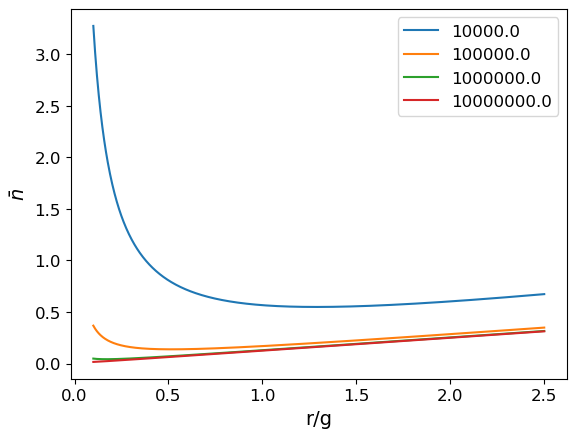

In [22]:
for i in range(gs.shape[0]):
    plt.plot(test_rs, nbars[i], label=str(gs[i]))

plt.xlabel("r/g")
plt.ylabel("$\\bar{n}$")
plt.legend()

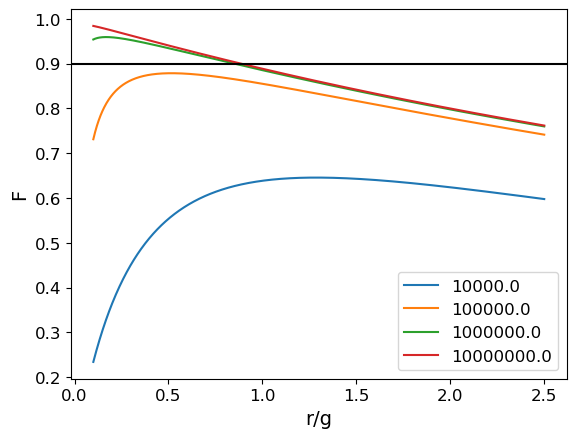

In [23]:
for i in range(gs.shape[0]):
    Fs = get_fidelity(nbars[i])
    plt.plot(test_rs, Fs, label=str(gs[i]))

plt.axhline(y=0.9, color='k')
plt.xlabel("r/g")
plt.ylabel("F")
plt.legend()

### b)

In [107]:
# We want to check the cooling vs g^2 / rγ with the optimal value of r for each g value
# The optimal value changes with g and γ
# Create array of g values
ωc = 2.87 * 2 * np.pi * 1e9
κ = 0
Q = 320000 # Sim max for PhC cavity
γ = ωc / Q
#γ = 1e5
g = np.logspace(5, 7, 1000)
r_g_ratio = np.linspace(0.01, 2, 1000)

In [108]:
min_nbar = 100
opt_rval_ind = 0
gsq_ov_rγ = np.zeros(g.shape[0])
nbars = np.zeros(g.shape[0])
for i in range(g.shape[0]):
    for k in range(r_g_ratio.shape[0]):
        temp = full_mean_photons_cav(κ, ωc, γ, r_g_ratio[k] * g[i], g[i], nT, nc, 0)
        if temp < min_nbar:
            min_nbar = temp
            opt_rval_ind = k
        
    nbars[i] = min_nbar
    gsq_ov_rγ[i] = g[i] ** 2 / (r_g_ratio[opt_rval_ind] * g[i] * γ)
    min_nbar = 100

Text(0, 0.5, '$\\bar{n}$')

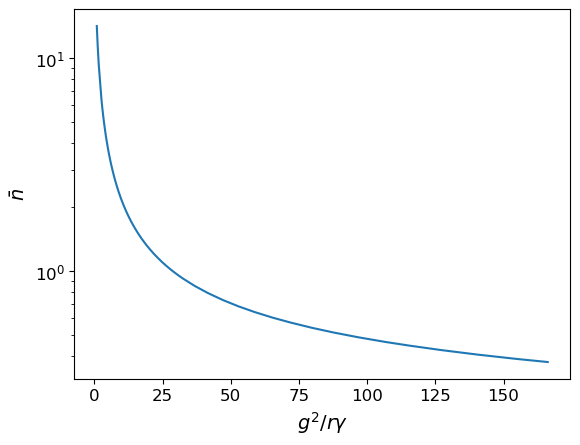

In [109]:
plt.semilogy(gsq_ov_rγ, nbars)
plt.xlabel("$g^2/r\\gamma$")
plt.ylabel("$\\bar{n}$")